# Exploratory Data Analysis (EDA) for Nutritional Deficiency Detection
This notebook performs EDA on the NHANES dataset to analyze dietary, examination, lab, medication, and questionnaire data.

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [2]:
# Load datasets with specified encoding to handle potential UnicodeDecodeError
diet_data = pd.read_csv('dataset/NHANES/diet.csv', encoding='ISO-8859-1')
examination_data = pd.read_csv('dataset/NHANES/examination.csv', encoding='ISO-8859-1')
labs_data = pd.read_csv('dataset/NHANES/labs.csv', encoding='ISO-8859-1')
medications_data = pd.read_csv(r'dataset/NHANES/medications.csv', encoding='ISO-8859-1')
questionnaire_data = pd.read_csv('dataset/NHANES/questionnaire.csv', encoding='ISO-8859-1')

## Overview of the Datasets
Let's inspect the first few rows of each dataset to understand their structure and content.

In [3]:
# Display the first few rows of each dataset
print('Diet Data:')
print(diet_data.head())
print('Examination Data:')
print(examination_data.head())
print('Labs Data:')
print(labs_data.head())
print('Medications Data:')
print(medications_data.head())
print('Questionnaire Data:')
print(questionnaire_data.head())

Diet Data:
    SEQN         WTDRD1         WTDR2D  DR1DRSTZ  DR1EXMER  DRABF  DRDINT  \
0  73557   16888.327864   12930.890649         1      49.0    2.0     2.0   
1  73558   17932.143865   12684.148869         1      59.0    2.0     2.0   
2  73559   59641.812930   39394.236709         1      49.0    2.0     2.0   
3  73560  142203.069917  125966.366442         1      54.0    2.0     2.0   
4  73561   59052.357033   39004.892993         1      63.0    2.0     2.0   

   DR1DBIH  DR1DAY  DR1LANG  ...  DRD370QQ  DRD370R  DRD370RQ  DRD370S  \
0      6.0     2.0      1.0  ...       NaN      NaN       NaN      NaN   
1      4.0     1.0      1.0  ...       NaN      2.0       NaN      2.0   
2     18.0     6.0      1.0  ...       NaN      NaN       NaN      NaN   
3     21.0     3.0      1.0  ...       NaN      NaN       NaN      NaN   
4     18.0     1.0      1.0  ...       NaN      2.0       NaN      2.0   

   DRD370SQ  DRD370T  DRD370TQ  DRD370U  DRD370UQ  DRD370V  
0       NaN      NaN

## Data Cleaning
Handle missing values, duplicates, and other inconsistencies in the datasets.

In [4]:
# Check for missing values
print('Missing values in Diet Data:')
print(diet_data.isnull().sum())
print('Missing values in Examination Data:')
print(examination_data.isnull().sum())
print('Missing values in Labs Data:')
print(labs_data.isnull().sum())
print('Missing values in Medications Data:')
print(medications_data.isnull().sum())
print('Missing values in Questionnaire Data:')
print(questionnaire_data.isnull().sum())

Missing values in Diet Data:
SEQN           0
WTDRD1         0
WTDR2D      1152
DR1DRSTZ       0
DR1EXMER    1030
            ... 
DRD370T     4692
DRD370TQ    8495
DRD370U     4692
DRD370UQ    9496
DRD370V     4693
Length: 168, dtype: int64
Missing values in Examination Data:
SEQN           0
PEASCST1       0
PEASCTM1     305
PEASCCT1    9493
BPXCHR      7852
            ... 
CSXSLTRT    8218
CSXSLTRG    8218
CSXNART     8200
CSXNARG     8200
CSAEFFRT    6276
Length: 224, dtype: int64
Missing values in Labs Data:
SEQN           0
URXUMA      1761
URXUMS      1761
URXUCR.x    1761
URXCRS      1761
            ... 
URDUURLC    7149
URXPREG     8552
URXUAS      7151
LBDB12      4497
LBDB12SI    4497
Length: 424, dtype: int64
Missing values in Medications Data:
SEQN            0
RXDUSE          0
RXDDRUG      6094
RXDDRGID     6178
RXQSEEN      6175
RXDDAYS      6176
RXDRSC1      6172
RXDRSC2     19480
RXDRSC3     20067
RXDRSD1      6561
RXDRSD2     19480
RXDRSD3     20067
RXDCOUNT     60

## Removing Outliers
Outliers can skew the analysis. Let's remove them from the dataset.

In [5]:
# Function to remove outliers using the IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Example: Remove outliers from the 'DR1TKCAL' column in the diet dataset
diet_data = remove_outliers(diet_data, 'DR1TKCAL')

# Example: Remove outliers from the 'LBXSCH' column in the labs dataset
labs_data = remove_outliers(labs_data, 'LBXSCH')

## Updated Analysis After Removing Outliers
Re-run the analysis and visualizations after removing outliers.

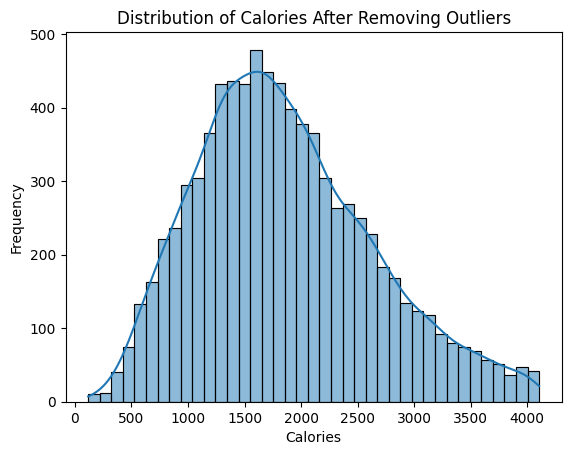

In [6]:
# Re-run the distribution plot for calories
sns.histplot(diet_data['DR1TKCAL'], kde=True)
plt.title('Distribution of Calories After Removing Outliers')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.show()

## Exploratory Visualizations
Generate visualizations to explore relationships and distributions in the data.

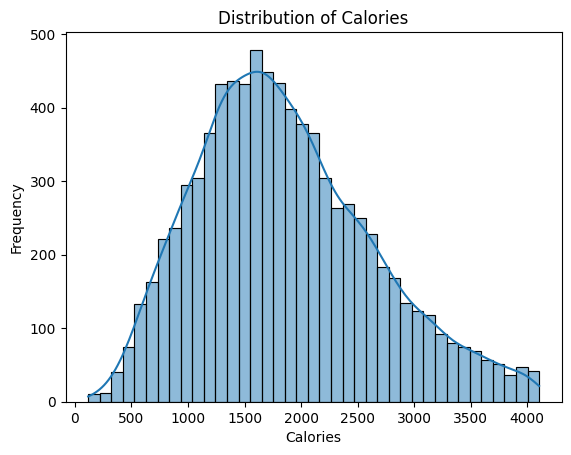

In [7]:
# Example: Distribution of calories in the diet dataset
sns.histplot(diet_data['DR1TKCAL'], kde=True)
plt.title('Distribution of Calories')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.show()

## Additional Visualizations
Explore the data further with bar plots, scatter plots, box plots, and heatmaps.

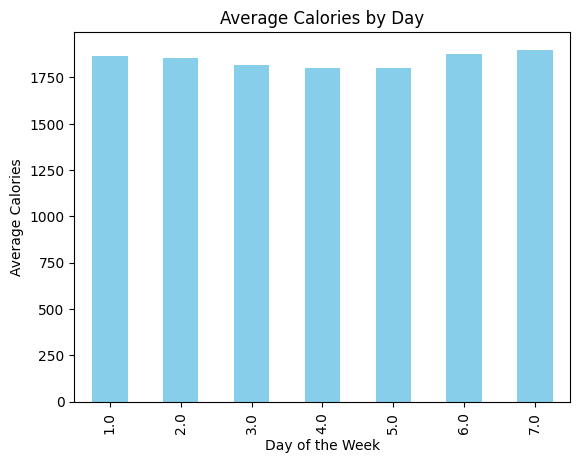

In [8]:
# Bar plot: Average calories by day
avg_calories = diet_data.groupby('DR1DAY')['DR1TKCAL'].mean()
avg_calories.plot(kind='bar', color='skyblue')
plt.title('Average Calories by Day')
plt.xlabel('Day of the Week')
plt.ylabel('Average Calories')
plt.show()

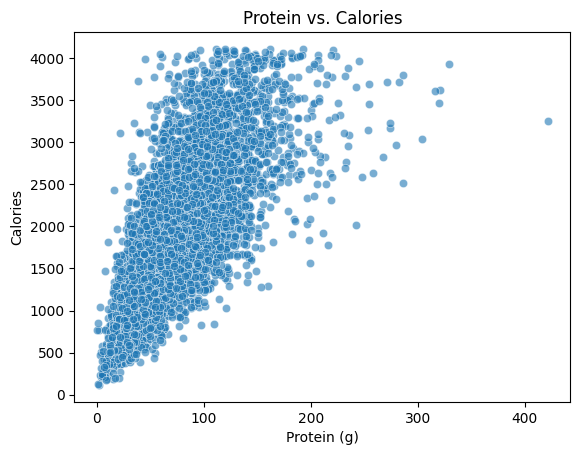

In [9]:
# Scatter plot: Relationship between protein and calories
sns.scatterplot(x=diet_data['DR1TPROT'], y=diet_data['DR1TKCAL'], alpha=0.6)
plt.title('Protein vs. Calories')
plt.xlabel('Protein (g)')
plt.ylabel('Calories')
plt.show()

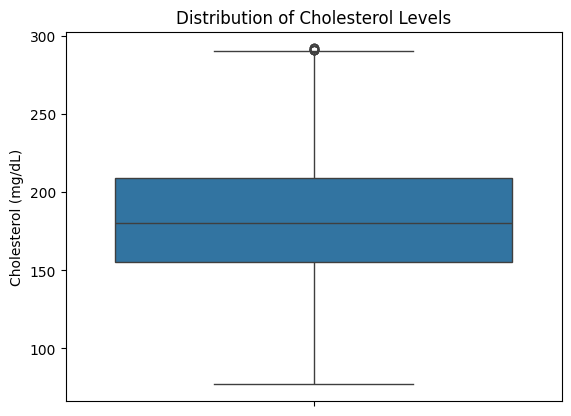

In [10]:
# Box plot: Distribution of cholesterol levels
sns.boxplot(y=labs_data['LBXSCH'])
plt.title('Distribution of Cholesterol Levels')
plt.ylabel('Cholesterol (mg/dL)')
plt.show()

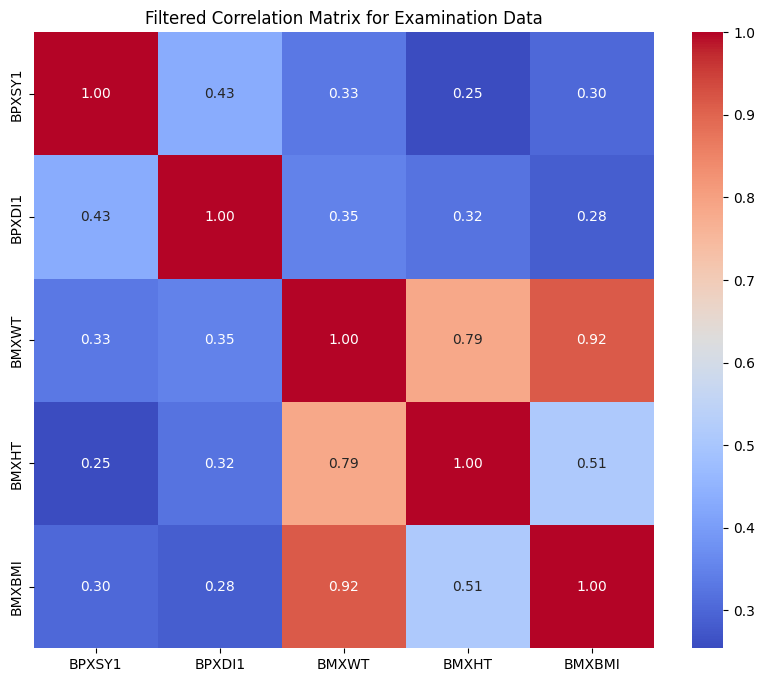

In [11]:
# Improved Heatmap: Filtered correlation matrix for examination data
filtered_features = ['BPXSY1', 'BPXDI1', 'BMXWT', 'BMXHT', 'BMXBMI']  # Example subset of features
filtered_data = examination_data[filtered_features]
correlation_matrix = filtered_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Filtered Correlation Matrix for Examination Data')
plt.show()

### Data Preparation

Preparing both the tabular NHANES data and the dermatological image data for the multi-modal model.

In [12]:
# Function to preprocess NHANES tabular data
def preprocess_tabular_data():
    # Merge relevant features from different datasets using patient IDs
    # Select key features from each dataset that might indicate nutritional deficiencies
    
    # Diet features: calories, vitamins, minerals, macronutrients
    diet_features = diet_data[['SEQN', 'DR1TKCAL', 'DR1TPROT', 'DR1TCARB', 'DR1TTFAT',
                               'DR1TVD', 'DR1TVARY', 'DR1TVB12', 'DR1TVC', 'DR1TVK']]
    
    # Lab features: hemoglobin, ferritin, vitamin levels, etc.
    lab_features = labs_data[['SEQN', 'LBXSCH', 'LBDHDL', 'LBXTC']]
    
    # Examination features: BMI, blood pressure, etc.
    exam_features = examination_data[['SEQN', 'BMXBMI', 'BPXSY1', 'BPXDI1']]
    
    # Merge datasets on SEQN (patient ID)
    merged_data = diet_features.merge(lab_features, on='SEQN', how='inner')
    merged_data = merged_data.merge(exam_features, on='SEQN', how='inner')
    
    # Handle missing values - impute with mean for numerical features
    for col in merged_data.columns:
        if col != 'SEQN' and merged_data[col].dtype in [np.float64, np.int64]:
            merged_data[col] = merged_data[col].fillna(merged_data[col].mean())
    
    # Scale numerical features
    scaler = StandardScaler()
    feature_cols = [col for col in merged_data.columns if col != 'SEQN']
    merged_data[feature_cols] = scaler.fit_transform(merged_data[feature_cols])
    
    # For demonstration, we'll create a synthetic target variable
    # In a real scenario, you would use actual nutritional deficiency labels
    # This would be replaced with your actual deficiency labels
    np.random.seed(42)  # for reproducibility
    merged_data['deficiency_label'] = np.random.randint(0, 3, size=len(merged_data))  # 3 classes: no deficiency, mild, severe
    
    # Split data into features and target
    X = merged_data.drop(['SEQN', 'deficiency_label'], axis=1)
    y = merged_data['deficiency_label']
    
    # One-hot encode target variable
    encoder = OneHotEncoder(sparse=False)
    y_encoded = encoder.fit_transform(y.values.reshape(-1, 1))
    
    return X, y_encoded, merged_data['SEQN']

In [13]:
# Function to load and preprocess dermatological images
def preprocess_image_data(img_size=(224, 224)):
    from tensorflow.keras.preprocessing.image import ImageDataGenerator
    
    # Image data generators for train and test sets
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )
    
    test_datagen = ImageDataGenerator(rescale=1./255)
    
    # Load images from directories
    train_generator = train_datagen.flow_from_directory(
        'dataset/Image data/train',
        target_size=img_size,
        batch_size=32,
        class_mode='categorical'
    )
    
    test_generator = test_datagen.flow_from_directory(
        'dataset/Image data/test',
        target_size=img_size,
        batch_size=32,
        class_mode='categorical'
    )
    
    return train_generator, test_generator

### Multi-Modal Deep Learning Model Architecture

Creating a model that combines tabular and image data for nutritional deficiency detection.

In [14]:
def create_multi_modal_model(tabular_shape, num_classes):
    # 1. Tabular Data Branch
    tabular_input = Input(shape=(tabular_shape,), name='tabular_input')
    x1 = Dense(128, activation='relu')(tabular_input)
    x1 = BatchNormalization()(x1)
    x1 = Dropout(0.3)(x1)
    x1 = Dense(64, activation='relu')(x1)
    x1 = BatchNormalization()(x1)
    x1 = Dropout(0.2)(x1)
    tabular_output = Dense(32, activation='relu')(x1)
    
    # 2. Image Data Branch - Using EfficientNet as the base model
    img_input = Input(shape=(224, 224, 3), name='img_input')
    base_model = EfficientNetB3(weights='imagenet', include_top=False, input_tensor=img_input)
    
    # Freeze the base model layers
    for layer in base_model.layers:
        layer.trainable = False
    
    # Add custom layers on top of EfficientNet
    x2 = base_model.output
    x2 = GlobalAveragePooling2D()(x2)
    x2 = Dense(64, activation='relu')(x2)
    x2 = BatchNormalization()(x2)
    x2 = Dropout(0.3)(x2)
    img_output = Dense(32, activation='relu')(x2)
    
    # 3. Combine the two branches
    combined = concatenate([tabular_output, img_output])
    combined = Dense(64, activation='relu')(combined)
    combined = BatchNormalization()(combined)
    combined = Dropout(0.3)(combined)
    combined = Dense(32, activation='relu')(combined)
    combined = BatchNormalization()(combined)
    output = Dense(num_classes, activation='softmax')(combined)
    
    # Create the model
    model = Model(inputs=[tabular_input, img_input], outputs=output)
    
    # Compile the model
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

In [15]:
# For demonstration: create a simplified separate model just for tabular data
def create_tabular_only_model(input_shape, num_classes):
    inputs = Input(shape=(input_shape,))
    x = Dense(128, activation='relu')(inputs)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    x = Dense(64, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.2)(x)
    x = Dense(32, activation='relu')(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model